# Проект 2. Разведывательный анализ данных 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('stud_math.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Описание содержимого колонок:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

## Первичный анализ данных в столбцах

,nunique,over_10,notnull
school,2,2,395
sex,2,2,395
age,8,5,395
address,2,2,378
famsize,2,2,368
Pstatus,2,2,350
Medu,5,4,392
Fedu,5,4,370
Mjob,5,5,376
Fjob,5,5,359


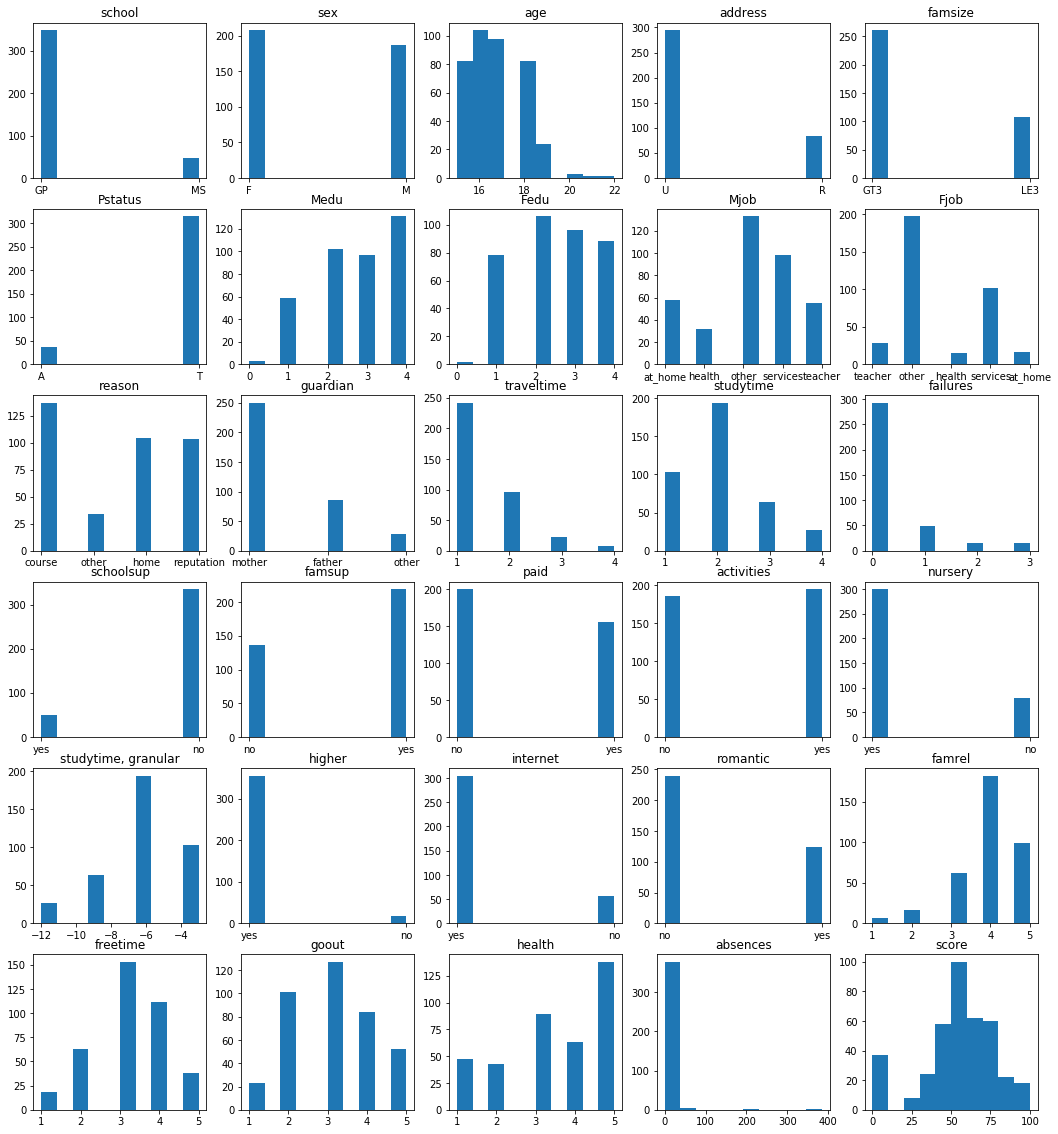

In [30]:
# Анализ колонок, содержащих номинативные признаки

def raw_analysis(columns):
    """
    Primary analysis of columns: number of unique values, values that are found for over 10 times,
    value_counts(), number of non-null values, and bar chart for each one.
    """
    
    rows, cols = 6, 5
    size = rows * cols
    fig, axs = plt.subplots(rows, cols, figsize=(18, 20)) # plot template
    columns_resize = np.hstack((np.array(columns, dtype=str), # fitting in the column names array to the shape of the plot
                         np.full(size-len(columns), fill_value='', dtype=str))).reshape((rows, cols))
    nunique, over_10, notnull = [], [], []
    
    for index, col in np.ndenumerate(columns_resize):
        if col == '':
            continue
        else:
#             print('Колонка: {}'.format(col))
#             print('Уникальных значений: {}; значений, встретившихся более 10 раз: {}'.format(
#                 df[col].nunique(), (df[col].value_counts()>10).sum())
#                  )
            nunique.append(df[col].nunique())
            over_10.append((df[col].value_counts()>10).sum())
            notnull.append(df[col].count())
            
#             display(pd.DataFrame(df[col].value_counts()))
#             display(df.loc[:, [col]].info())
            
            axs[index[0], index[1]].hist(df[col][df[col].notna()]) # filling in the plot with subplots
            axs[index[0], index[1]].set_title(col)
        
    pivot = pd.DataFrame({'nunique': nunique, 'over_10': over_10, 'notnull': notnull}, index=columns)
    display(pivot)
        
        
# cols1 = list(df.columns[:2]) + list(df.columns[3:28])
raw_analysis(df.columns)

Выводы из вышеизложенного:

1. Колонки содержат небольшое число пропусков.
2. Пропуски заполнены корректно, содержат np.nan values.
3. В целом колонки заполнены правильно, содержат только предполагаемые значения. Выбросы (ошибки заполнения) содержатся только в **Fedu** (>4), **famrel** (<0) и, скорее всего, **absences** (>100). Эти колонки рассмотрим отдельно.

In [5]:
# Fedu может содержать только целые значения от 0 до 4, остальные заменяем np.nan
df['Fedu'] = df['Fedu'].apply(lambda x: x if x in range(0, 5) else np.nan)
df['Fedu'].value_counts()

2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: Fedu, dtype: int64

In [6]:
# famrel может содержать только целые значения от 1 до 5, остальные заменяем np.nan
df['famrel'] = df['famrel'].apply(lambda x: x if x in range(1, 6) else np.nan)
df['famrel'].value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

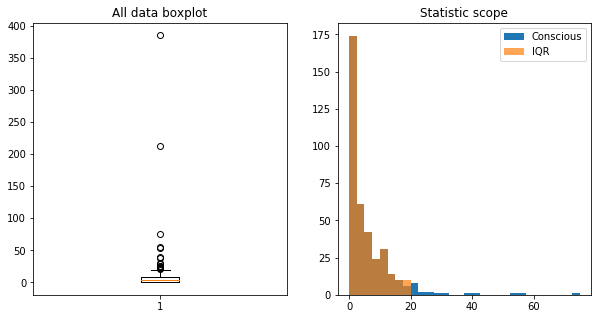

In [70]:
# absences нужно обрабатывать стат. методами

def stat_for_col(column): 
    median = df[column].median()
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    iqr = perc75 - perc25
    return median, perc25, perc75, iqr
    

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].boxplot(df['absences'][df['absences'].notna()]) # визуализируем выбросы
axs[0].set_title('All data boxplot')

median, perc25, perc75, iqr = stat_for_col('absences') # находим численные занчения стат параметров

axs[1].hist(df['absences'][df['absences'] < 100], label='Conscious', bins=30) # отбрасываем только 2 выброса, которые >100
axs[1].hist(df['absences'][df['absences'].between(perc25-1.5*iqr, perc75+1.5*iqr)], label='IQR', bins=8, alpha=0.7)
axs[1].set_title('Statistic scope')
axs[1].legend()

In [71]:
# количество выбросов между максимумом стат. разброса данных и 100
display(pd.DataFrame(df['absences'][df['absences'].between(perc75+1.5*iqr, 100)].sort_values()))

,absences
311,20.0
118,20.0
304,20.0
237,20.0
260,21.0
313,22.0
277,22.0
216,22.0
320,23.0
198,24.0


In [72]:
# в данном интервале содержится довольно много потенциально реальных значений, 
# поэтому отбрасываем только 2 явных выброса >100
df['absences'] = df['absences'].apply(lambda x: x if x <= 100 else np.nan)

,nunique,over_10,notnull
school,2,2,395
sex,2,2,395
age,8,5,395
address,2,2,378
famsize,2,2,368
Pstatus,2,2,350
Medu,5,4,392
Fedu,5,4,370
Mjob,5,5,376
Fjob,5,5,359


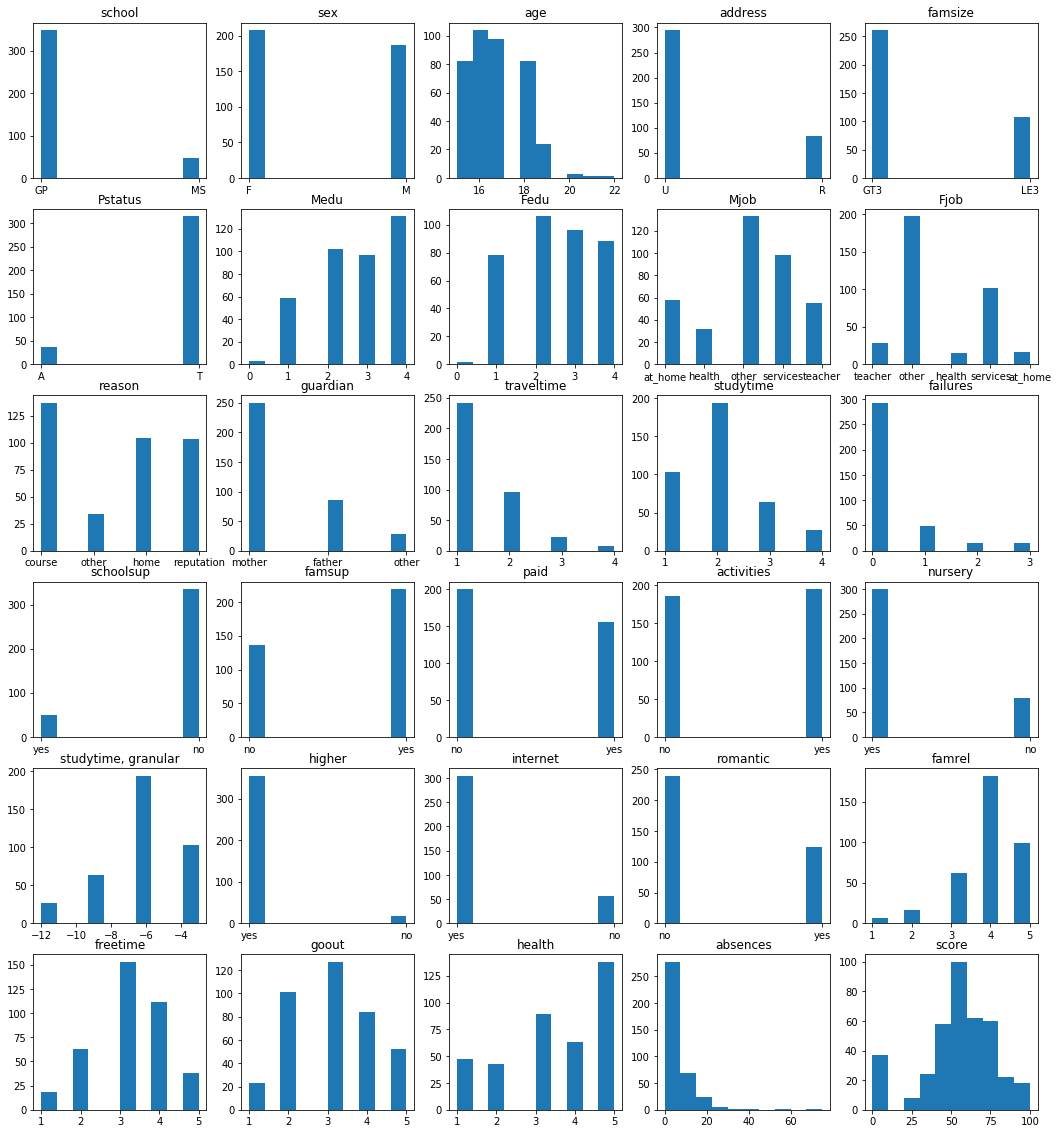

In [74]:
# проведем первичный анализ обновленного датафрейма
raw_analysis(df.columns)

In [ ]:
# studytime, granular - ?